# Converting SynthDet labels to yolo

Project structure with labels

In [ ]:
!cd Info && ls

Loading json with the labels

In [44]:
import json

path_to_labels = 'Info/captures_00'
number_files = 7 # TODO: MODIFY IF NUMBER OF FILES IS BIGGER
jsons = []
for file_number in range(number_files):
    file = open(path_to_labels+str(file_number)+".json", 'r')
    j = json.load(file)
    jsons.append(j)

> Yolo Format folows this pattern, we convert the json to fit the requeriments

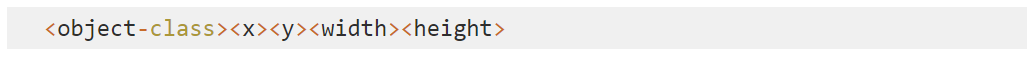

In [62]:
file_annot = {}
for j in range(len(jsons)): #Iterating over files
    for label in jsons[j]['captures']: #Iterating over captures of the files
        file = label['filename'].split('/')[1]
        file_annot[file] = [] #Creating new records for the file
        for annot in label['annotations'][0]['values']: #Iterating  over annot in captures
            yolo_fmt =  [str(annot['label_id']), str(annot['x']), str(annot['y']), str(annot['width']), str(annot['height'])]
            file_annot[file].append(yolo_fmt)

In [63]:
print(file_annot['rgb_1001.png'])

[['1', '1315.0', '30.0', '150.0', '77.0'], ['1', '1041.0', '82.0', '215.0', '108.0'], ['1', '671.0', '132.0', '214.0', '110.0'], ['1', '1412.0', '271.0', '213.0', '86.0'], ['1', '1216.0', '317.0', '136.0', '69.0'], ['1', '413.0', '396.0', '118.0', '65.0'], ['1', '914.0', '423.0', '155.0', '78.0'], ['1', '1195.0', '587.0', '222.0', '121.0'], ['1', '1069.0', '676.0', '193.0', '99.0'], ['1', '662.0', '795.0', '179.0', '72.0'], ['1', '349.0', '810.0', '162.0', '89.0'], ['1', '1327.0', '866.0', '239.0', '95.0'], ['1', '842.0', '889.0', '280.0', '113.0'], ['1', '1070.0', '1008.0', '273.0', '72.0'], ['1', '491.0', '1040.0', '176.0', '40.0']]


Writing  the logs to file 

In [68]:
import pandas as pd
from pathlib import Path

for key, val in file_annot.items():
    df = pd.DataFrame(val)
    path_out = Path('Labels/'+key.split('.')[0]+'.txt')
    df.to_csv(path_out, header=False, index=False, sep=' ')

# YOLO V7 configuration

In [69]:
!git clone https://github.com/WongKinYiu/yolov7.git

Cloning into 'yolov7'...
remote: Enumerating objects: 994, done.
remote: Total 994 (delta 0), reused 0 (delta 0), pack-reused 994
Receiving objects: 100% (994/994), 69.70 MiB | 7.69 MiB/s, done.
Resolving deltas: 100% (491/491), done.


In [76]:
!cd yolov7 && pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 8.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 7.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 16.7 MB/s eta 0:00:00m eta 0:00:010:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.8/661.8 kB 6.4 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 7.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.4/776.4 MB 3.2 MB/s eta 0:00:00m eta 0:00:010:00:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 8.1 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.8/407.8 kB 5.5 MB/s eta 0:00:000:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 8.0 MB/s e

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 3.6 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 11.1 MB/s eta 0:00:00


In [80]:
!conda install pytorch==1.11.0 torchvision==0.12.0 torchaudio==0.11.0 cudatoolkit=11.3 -c pytorch -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
  - anaconda/linux-64::ca-certificates-2022.07.19-h06a4308_0, anaconda/linux-64::openssl-1.1.1q-h7f8727e_0
  - anaconda/linux-64::openssl-1.1.1q-h7f8727e_0, defaults/linux-64::ca-certificates-2022.07.19-h06a4308_0
  - anaconda/linux-64::ca-certificates-2022.07.19-h06a4308_0, defaults/linux-64::openssl-1.1.1q-h7f8727e_0
  - defaults/linux-64::ca-certificates-2022.07.19-h06a4308_0, defaults/linux-64::openssl-1.1.1q-h7f8727edone


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda


^C


In [87]:
import torch
torch.cuda.is_available()

False

In [92]:
!cd yolov7  && python3 train.py --workers 8  --batch-size 8 --epochs 1000 --img 640 640 --data data/coco.yaml --hyp data/hyp.scratch.custom.yaml --cfg cfg/training/yolov7.yaml --name yolov7-custom --weights data/yolov7.pt

YOLOR 🚀 v0.1-115-g072f76c torch 1.11.0 CPU

Namespace(weights='data/yolov7.pt', cfg='cfg/training/yolov7.yaml', data='data/coco.yaml', hyp='data/hyp.scratch.custom.yaml', epochs=1000, batch_size=8, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='yolov7-custom', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=False, world_size=1, global_rank=-1, save_dir='runs/train/yolov7-custom', total_batch_size=8)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.

 96                -1  1   1180160  models.common.Conv                      [512, 256, 3, 1]              
 97                -1  1    590336  models.common.Conv                      [256, 256, 3, 1]              
 98                -1  1    590336  models.common.Conv                      [256, 256, 3, 1]              
 99                -1  1    590336  models.common.Conv                      [256, 256, 3, 1]              
100[-1, -2, -3, -4, -5, -6]  1         0  models.common.Concat                    [1]                           
101                -1  1   1049600  models.common.Conv                      [2048, 512, 1, 1]             
102                75  1    328704  models.common.RepConv                   [128, 256, 3, 1]              
103                88  1   1312768  models.common.RepConv                   [256, 512, 3, 1]              
104               101  1   5246976  models.common.RepConv                   [512, 1024, 3, 1]             
105   [102, 103, 104]  1     34

train: WARNING: Ignoring corrupted image and/or label data/train/rgb_142.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_143.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_144.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_145.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_146.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_147.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_148.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_149.png: non-normalized or out of b

train: WARNING: Ignoring corrupted image and/or label data/train/rgb_205.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_206.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_207.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_208.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_209.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_21.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_210.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_211.png: non-normalized or out of bo

train: WARNING: Ignoring corrupted image and/or label data/train/rgb_271.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_272.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_273.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_274.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_275.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_276.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_277.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_278.png: non-normalized or out of b

train: WARNING: Ignoring corrupted image and/or label data/train/rgb_326.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_327.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_328.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_329.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_33.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_330.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_331.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_332.png: non-normalized or out of bo

train: WARNING: Ignoring corrupted image and/or label data/train/rgb_386.png: non-normalized or out of bounds coordinate labels
train: Scanning 'data/train' images and labels... 318 found, 0 missing, 0 empty,train: WARNING: Ignoring corrupted image and/or label data/train/rgb_387.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_388.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_389.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_39.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_390.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_391.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring 

train: WARNING: Ignoring corrupted image and/or label data/train/rgb_44.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_440.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_441.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_442.png: non-normalized or out of bounds coordinate labels
train: Scanning 'data/train' images and labels... 381 found, 0 missing, 0 empty,train: WARNING: Ignoring corrupted image and/or label data/train/rgb_443.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_444.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_445.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring 

train: WARNING: Ignoring corrupted image and/or label data/train/rgb_5.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_50.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_500.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_501.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_502.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_503.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_504.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_505.png: non-normalized or out of boun

train: WARNING: Ignoring corrupted image and/or label data/train/rgb_553.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_554.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_555.png: non-normalized or out of bounds coordinate labels
train: Scanning 'data/train' images and labels... 506 found, 0 missing, 0 empty,train: WARNING: Ignoring corrupted image and/or label data/train/rgb_556.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_557.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_558.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_559.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring

train: Scanning 'data/train' images and labels... 563 found, 0 missing, 0 empty,train: WARNING: Ignoring corrupted image and/or label data/train/rgb_607.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_608.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_609.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_61.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_610.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_611.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_612.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring 

train: WARNING: Ignoring corrupted image and/or label data/train/rgb_659.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_66.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_660.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_661.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_662.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_663.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_664.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_665.png: non-normalized or out of bo

train: WARNING: Ignoring corrupted image and/or label data/train/rgb_712.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_713.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_714.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_715.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_716.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_717.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_718.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_719.png: non-normalized or out of b

train: WARNING: Ignoring corrupted image and/or label data/train/rgb_764.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_765.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_766.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_767.png: non-normalized or out of bounds coordinate labels
train: Scanning 'data/train' images and labels... 741 found, 0 missing, 0 empty,train: WARNING: Ignoring corrupted image and/or label data/train/rgb_768.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_769.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_77.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring 

train: Scanning 'data/train' images and labels... 804 found, 0 missing, 0 empty,train: WARNING: Ignoring corrupted image and/or label data/train/rgb_824.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_825.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_826.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_827.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_828.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_829.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_83.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring 

train: WARNING: Ignoring corrupted image and/or label data/train/rgb_88.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_880.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_881.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_882.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_883.png: non-normalized or out of bounds coordinate labels
train: Scanning 'data/train' images and labels... 870 found, 0 missing, 0 empty,train: WARNING: Ignoring corrupted image and/or label data/train/rgb_884.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring corrupted image and/or label data/train/rgb_885.png: non-normalized or out of bounds coordinate labels
train: WARNING: Ignoring 